In [63]:
import scipy
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
db = pd.read_csv("ytdaily/BR_youtube_trending_data.csv")

In [3]:
db

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...
5,Vu6PNpYKu2U,DICAS DA RODADA 2 | CARTOLA FC 2020: BORA MITA...,2020-08-11T17:14:20Z,UCJVbvkrBLp7L2pnaqc5CmQQ,Cartoleiros Gazeta do Povo,17,2020-08-12T00:00:00Z,cartola|cartola fc|cartola 2020|dicas cartola ...,117217,14220,106,785,https://i.ytimg.com/vi/Vu6PNpYKu2U/default.jpg,False,False,"No vídeo, time principal, time para liga tiro ..."
6,ly8jXKq_9AE,LIVE PLAYLIST DA TAY.,2020-08-12T03:31:08Z,UCg9nWuUISG69Hv2VaCrE72w,Tayara Andreza,10,2020-08-12T00:00:00Z,[None],93022,7595,166,136,https://i.ytimg.com/vi/ly8jXKq_9AE/default.jpg,False,False,#playlistdatay #tayaraandreza #taydeumjeitodif...
7,QAUqqcEU0Xc,PEDI ELA EM NAMORO? FIZ UM JANTAR ROMÂNTICO PR...,2020-08-11T00:02:35Z,UCOPS25AxMB9te9_-AHt3JEg,PEIXE,24,2020-08-12T00:00:00Z,peixe|peixinho,1427499,225365,2287,9647,https://i.ytimg.com/vi/QAUqqcEU0Xc/default.jpg,False,False,Neste video Espero que se divirtam! :)►CANAIS ...
8,eA4FRvf6vdM,AO VIVO - Apresentação do meia Carlinhos e bat...,2020-08-12T00:58:57Z,UCZD5qcen7lbLPFTjfvdLFcw,Vasco TV,17,2020-08-12T00:00:00Z,#Vasco|#VascoDaGama|#VascoTV|#FutebolBrasileiro,97711,17153,65,226,https://i.ytimg.com/vi/eA4FRvf6vdM/default.jpg,False,False,NaN
9,8f70QZQB4UA,MASTERCHEF BRASIL (11/08/2020) | PARTE 2 | EP ...,2020-08-12T08:02:01Z,UC2EWGw-KBjEReUbXMJEiaCA,MasterChef Brasil,24,2020-08-12T00:00:00Z,masterchef temporada 7|participantes do master...,199577,7700,129,874,https://i.ytimg.com/vi/8f70QZQB4UA/default.jpg,False,False,Assista à Parte 2 do Episódio 5 da 7ª Temporad...


 # Primeira Pergunta
 
 Existe uma correlação entre o horário em que os vídeos que entraram nas trends do youtube e o sucesso do vídeo na plataforma?

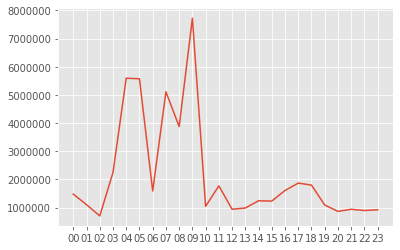

In [64]:
hour_mean = db.groupby(db.publishedAt.str[11:13])["view_count"].mean()
sz = db.groupby(db.publishedAt.str[11:13]).size()

plt.plot(hour_mean)

# Segunda pergunta

    Qual a correlação entre as tags utilizadas num vídeo e sucesso dele dentro dos trends da plataforma
    
    Possível ampliação da pergunta:
        Corrigir sobre Tags que apontam pro próprio canal.
        

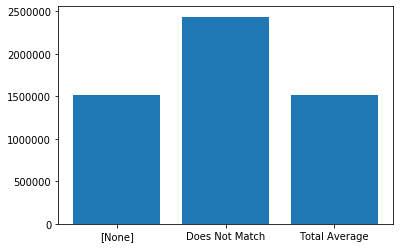

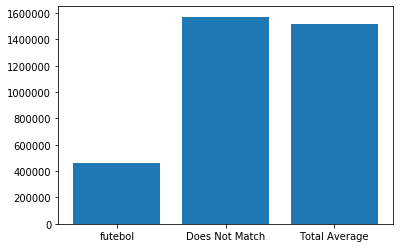

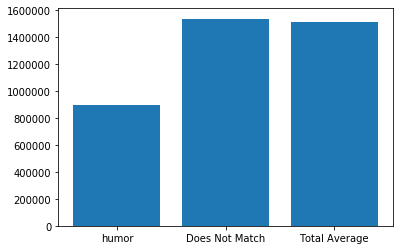

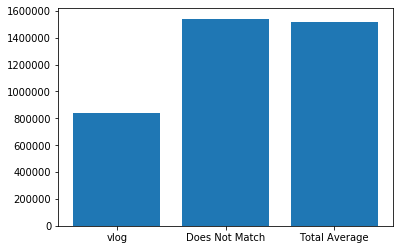

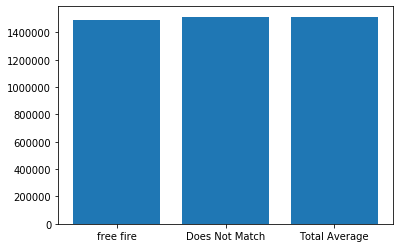

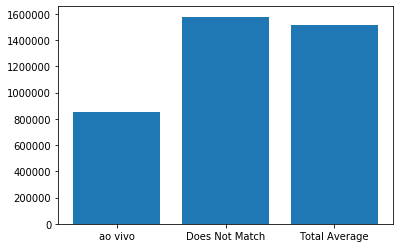

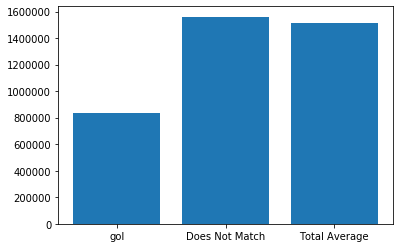

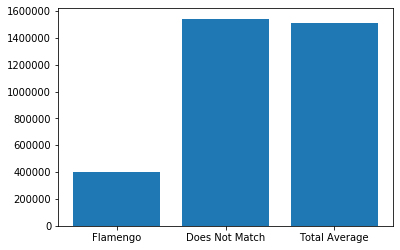

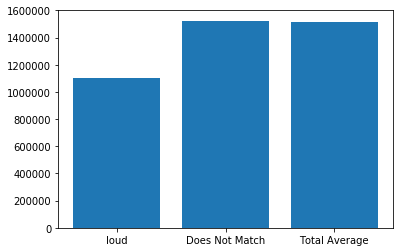

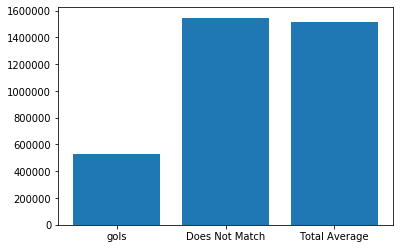

In [5]:
from operator import itemgetter 

def getAllTags (db: pd.DataFrame) -> dict:
    alltags = dict()
    for tags in db.tags:
        
        tags = tags.split("|")
        for tag in tags:
            if tag in alltags:
                alltags[tag] += 1
            else:
                alltags[tag] = 1
    return alltags

alltags = getAllTags(db)

alltags_sorted = sorted(alltags.items(), key=itemgetter(1), reverse=True)[ : 600 ]
alltags_wmean = dict()

for tag, size in alltags_sorted[ : 10]:
    
    means = db.groupby(db.tags.str.contains(tag))["view_count"].mean()
    total_average = db["view_count"].mean()
    
    tags = [ tag, "Does Not Match", "Total Average" ]
    means = [ means[1], means[0], total_average]
    
    plt.bar(x = tags, height=means)
    plt.show()

# Terceira Pergunta

A quantidade de tags de um vídeo influenciam seu sucesso nos trendings do youtube?

tags
1     5217
2      396
3      503
4      933
5     1212
6     1133
7     1395
8     1014
9     1315
10    1180
11    1129
12    1489
13     938
14    1080
15    1155
16    1155
17    1064
18     938
19    1089
20     771
21     914
22    1125
23    1000
24     912
25     881
26     933
27     868
28     668
29     706
30     496
      ... 
43      89
44     110
45      82
46      75
47      45
48      67
49      15
50      63
51      40
52      23
53      13
54      29
55      26
56      22
57      33
58      17
59      33
60      29
61      26
62      19
63      13
64      17
65      16
66       7
67       6
68      27
69       5
70     318
72      13
74       3
Length: 72, dtype: int64


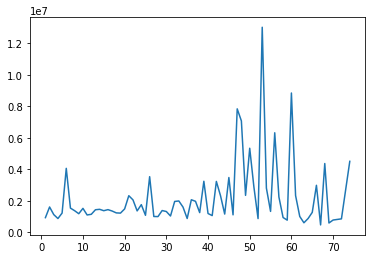

In [6]:
tag_mean = db.groupby(db.tags.str.split("|").str.len())["view_count"].mean()
sz = db.groupby(db.tags.str.split("|").str.len()).size()

plt.plot(tag_mean)



print(sz)

In [12]:
dj = pd.read_json("ytdaily/BR_category_id.json")
dj.iloc[0]["items"]

{'kind': 'youtube#videoCategory',
 'etag': 'IfWa37JGcqZs-jZeAyFGkbeh6bc',
 'id': '1',
 'snippet': {'title': 'Film & Animation',
  'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}

# Quarta Pergunta

Qual a categoria de vídeo com o maior número de views dentre os trendings do youtube?<br>
**Hipótese Nula:** Independente da categoria do vídeo todos têm, aproximadamente, o mesmo número de views.

In [52]:
dj = pd.read_json("ytdaily/US_category_id.json")
n = dj["items"].count()
category = []
indice = []
for i in range(n):
    title = dj["items"][i]["snippet"]["title"]
    id_cat = int(dj["items"][i]["id"])
    category.append(title)
    indice.append(id_cat)
cat = pd.DataFrame({"categoryId": indice, "Category": category})
cat

,categoryId,Category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [46]:
new_db = db.groupby(["categoryId"]).mean()
new_db = new_db.reset_index()
new_db

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,1,1.544891e+06,84863.314088,1619.586605,5749.967667,0.000000,0.000000
1,2,3.054760e+05,34053.035264,277.078086,1759.229219,0.000000,0.000000
2,10,3.147671e+06,234845.984815,4866.101131,27485.200973,0.004565,0.001489
3,15,1.202775e+05,17954.000000,154.058824,862.411765,0.000000,0.000000
4,17,6.776024e+05,33452.522336,713.846203,2133.743140,0.000000,0.012444
5,19,1.917385e+05,18796.012346,362.703704,1088.617284,0.345679,0.061728
6,20,1.884874e+06,127486.128421,2284.038246,6382.492982,0.005263,0.001404
7,22,7.511230e+05,82155.185469,1102.678505,4088.859564,0.017409,0.009517
8,23,8.649991e+05,82819.008099,1328.654968,3167.062095,0.026458,0.000000
9,24,9.830380e+05,101359.852947,1434.284007,6171.481966,0.017003,0.001546


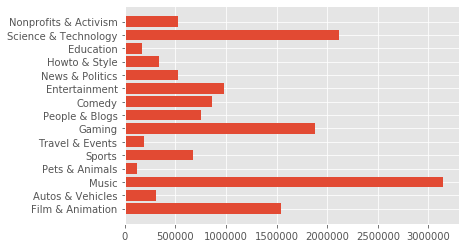

In [65]:
new_db = new_db.merge(cat, on="categoryId")
plt.barh(y = new_db["Category"], width=new_db["view_count"])
plt.show()

# Quinta pergunta

Qual a chance de um vídeo da categoria 'Sports' ter o mesmo número de views de um vídeo da categoria 'Music'?

In [96]:
def calcula_IC(df, target):
    mean = df[target].mean(axis = 0)
    std = df[target].std(axis = 0)
    n = df[target].count()
    xt = mean
    aux = (1.96*(std/(n**(1/2))))
    inferior = xt - aux
    superior = xt + aux
    
    return [ inferior, superior ]

intervalo_music = calcula_IC(db[db["categoryId"] == 10], "view_count")
intervalo_sport = calcula_IC(db[db["categoryId"] == 17], "view_count")
print(intervalo_music)
print(intervalo_sport)

[2958525.633106102, 3336815.6221539224]
[641295.2629986953, 713909.5627830534]


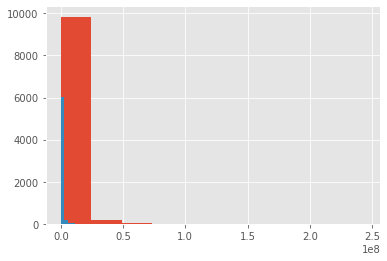

In [89]:
plt_db = db[db["categoryId"] == 10]
plt.hist(plt_db["view_count"], bins= 10)
plt_db = db[db["categoryId"] == 17]
plt.hist(plt_db["view_count"], bins= 10)
plt.show()